<a href="https://colab.research.google.com/github/artbrgn/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-make-explanatory-visualizations/Copy_of_LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).












In [1]:
# Your Work Here
from IPython.display import display, Image

url='https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

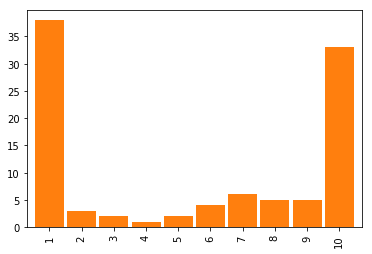

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                  index=range(1,11))

fake.plot.bar(color='C1', width=0.9)

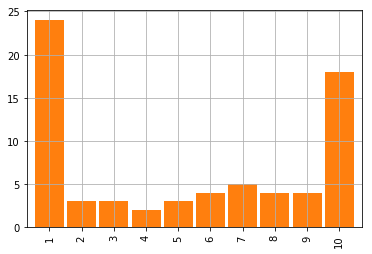

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

ax = fake2.value_counts().sort_index().plot.bar(color='C1',width=0.9);

ax.grid(True)

In [5]:
display(example)

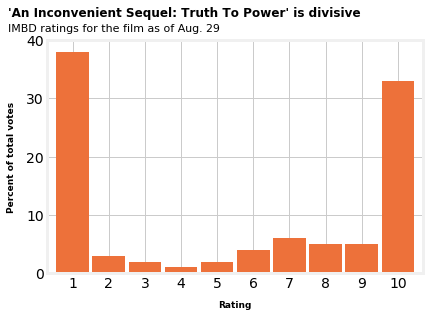

In [9]:
import matplotlib.pyplot as plt

# use the 538 stylessheet
plt.style.use('fivethirtyeight')

# generate our figure
fig = plt.figure()
fig.patch.set(facecolor='white')

#generate our axes (center section) for our plot
ax = fake.plot.bar(color='#ED713A', width=0.9)
ax.set(facecolor='white')

# There is more than one way to set a title on a graph
# matplotlib is not "pythonic"
# fig.suptitle('test title')
# ax.set_title("title")

# If we want a really custom title
# We can just use a text annotation and make it look like a title
ax.text(x=-1.8, y=44, s="'An Inconvenient Sequel: Truth To Power' is divisive",
       fontweight='bold', fontsize=12);
ax.text(x=-1.8, y=41.5, s="IMBD ratings for the film as of Aug. 29",
       fontsize=11)

# set our axiz labels (these are just text ogjext that have been rotated
ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold',
             labelpad=10)
ax.set_xlabel("Rating", fontsize=9, fontweight='bold', labelpad=10)

#fix our trick lables. yet again, these are text and use the text parameteres!
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0,50,10))

# "squelch" the funny return output that shows up above the graph
plt.show()

In [10]:
display(example)

### 2) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

In [11]:
from IPython.display import display, Image

url='https://fivethirtyeight.com/wp-content/uploads/2015/11/hickey-side-dish-1.png?w=1150'
example = Image(url=url, width=400)

display(example)

In [0]:
import matplotlib.pyplot as plt

In [17]:
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [31]:
import altair as alt
from vega_datasets import data

#states = alt.topo_feature(data.us_10m.url, 'states')
#capitals = data.us_state_capitals.url

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='blue',
    stroke='white'
).properties(
    title='US State Capitols',
    width=650,
    height=400
).project('albersUsa')

# # Points and text
hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['lat', 'lon'])

base = alt.Chart(capitals).encode(
    longitude='lon:Q',
    latitude='lat:Q',
)

text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('city', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)

points = base.mark_point().encode(
    color=alt.value('black'),
    size=alt.condition(~hover, alt.value(30), alt.value(100))
).add_selection(hover)

background + points + text

alt.LayerChart(...)

In [32]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

alt.RepeatChart(...)

# STRETCH OPTIONS

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).


### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here